In [4]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=150)

train_data[0]

train_labels[0]

max([max(sequence) for sequence in train_data])

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

import numpy as np
def vectorize_sequences(sequences, dimension=150):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Epoch 1/20
10/10 [==============================] - 2s 53ms/step - loss: 0.6826 - accuracy: 0.5572 - val_loss: 0.6722 - val_accuracy: 0.5921
Epoch 2/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6629 - accuracy: 0.6068 - val_loss: 0.6569 - val_accuracy: 0.6248
Epoch 3/20
10/10 [==============================] - 0s 42ms/step - loss: 0.6456 - accuracy: 0.6380 - val_loss: 0.6414 - val_accuracy: 0.6485
Epoch 4/20
10/10 [==============================] - 0s 45ms/step - loss: 0.6278 - accuracy: 0.6586 - val_loss: 0.6325 - val_accuracy: 0.6487
Epoch 5/20
10/10 [==============================] - 0s 36ms/step - loss: 0.6122 - accuracy: 0.6754 - val_loss: 0.6124 - val_accuracy: 0.6758
Epoch 6/20
10/10 [==============================] - 0s 38ms/step - loss: 0.5973 - accuracy: 0.6858 - val_loss: 0.6007 - val_accuracy: 0.6869
Epoch 7/20
10/10 [==============================] - 0s 42ms/step - loss: 0.5840 - accuracy: 0.6974 - val_loss: 0.5919 - val_accuracy: 0.6904
Epoch 8/20
10

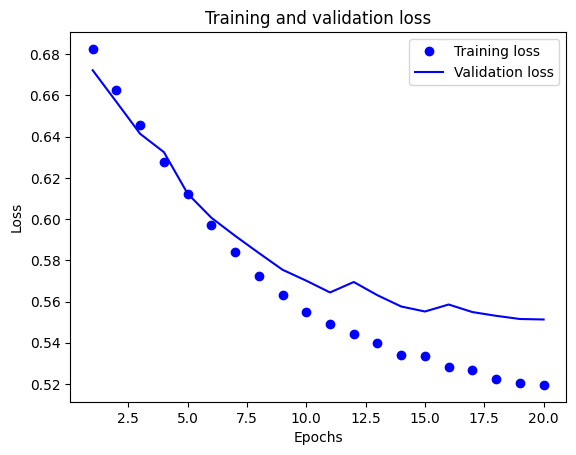

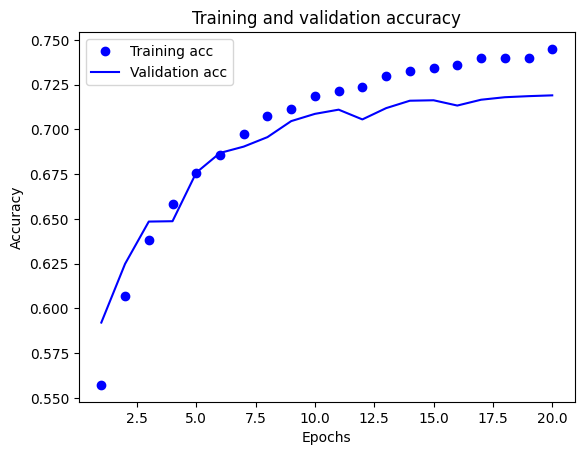

Epoch 1/4
49/49 [==============================] - 2s 4ms/step - loss: 0.6803 - accuracy: 0.5672
Epoch 2/4
49/49 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.6778
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7113
Epoch 4/4
782/782 [==============================] - 1s 2ms/step


array([[0.41381916],
       [0.7924271 ],
       [0.65793777],
       ...,
       [0.18052727],
       [0.4048195 ],
       [0.37304375]], dtype=float32)

In [32]:
#embedded
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:20000]
partial_x_train = x_train[20000:]
y_val = y_train[:20000]
partial_y_train = y_train[20000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

model.predict(x_test)

In [21]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2024-04-25 22:30:51--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-25 22:30:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2024-04-25 22:33:31 (5.17 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



Found 400000 word vectors.
Epoch 1/20
10/10 [==============================] - 1s 37ms/step - loss: 0.6971 - accuracy: 0.5182 - val_loss: 0.6788 - val_accuracy: 0.5695
Epoch 2/20
10/10 [==============================] - 0s 21ms/step - loss: 0.6678 - accuracy: 0.5942 - val_loss: 0.6590 - val_accuracy: 0.6137
Epoch 3/20
10/10 [==============================] - 0s 21ms/step - loss: 0.6462 - accuracy: 0.6386 - val_loss: 0.6428 - val_accuracy: 0.6406
Epoch 4/20
10/10 [==============================] - 0s 14ms/step - loss: 0.6273 - accuracy: 0.6614 - val_loss: 0.6275 - val_accuracy: 0.6569
Epoch 5/20
10/10 [==============================] - 0s 14ms/step - loss: 0.6101 - accuracy: 0.6808 - val_loss: 0.6143 - val_accuracy: 0.6708
Epoch 6/20
10/10 [==============================] - 0s 21ms/step - loss: 0.5973 - accuracy: 0.6904 - val_loss: 0.6038 - val_accuracy: 0.6793
Epoch 7/20
10/10 [==============================] - 0s 21ms/step - loss: 0.5849 - accuracy: 0.7008 - val_loss: 0.5959 - val_acc

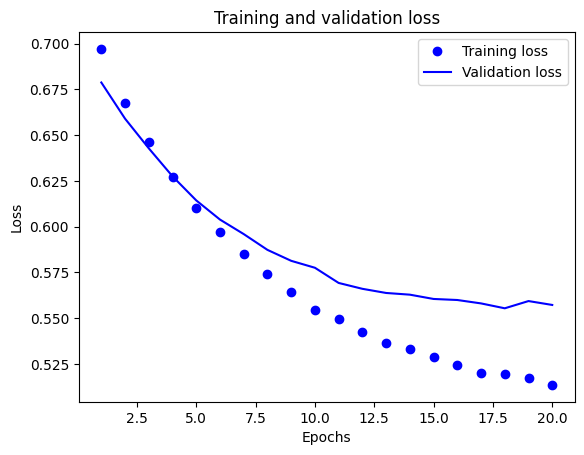

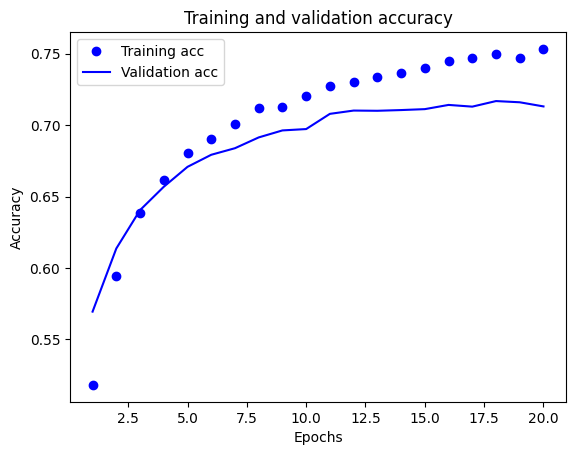

Epoch 1/4
49/49 [==============================] - 1s 5ms/step - loss: 0.6419 - accuracy: 0.6316
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.5744 - accuracy: 0.7016
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.5471 - accuracy: 0.7235
Epoch 4/4
782/782 [==============================] - 2s 2ms/step


array([[0.370074  ],
       [0.7647182 ],
       [0.73025286],
       ...,
       [0.33978206],
       [0.41028136],
       [0.42883053]], dtype=float32)

In [34]:
#pretrained
import tensorflow_hub as hub

text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)

import numpy as np
path_to_glove_file = "glove.6B.100d.txt"
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print(f"Found {len(embeddings_index)} word vectors.")

from tensorflow import keras
from tensorflow.keras import layers

embedding_dim = 100
vocabulary = text_vectorization.get_vocabulary()
word_index = dict(zip(vocabulary, range(len(vocabulary))))
embedding_matrix = np.zeros((max_tokens, embedding_dim))
for word, i in word_index.items():
    if i < max_tokens:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector



model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:20000]
partial_x_train = x_train[20000:]
y_val = y_train[:20000]
partial_y_train = y_train[20000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

model.predict(x_test)